<a href="https://colab.research.google.com/github/sumantsharma16/Deep-learning/blob/sumantsharma16-machinelearning/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Data Collection & Processing

load the data from csv file to pandas DataFrame

In [2]:
titanic_data = pd.read_csv('/content/tested.csv')

In [3]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.shape

(418, 12)

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


checking the number of missing value in each column

In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Handiling the Missing values
d

In [10]:
# drop the cabin column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)


In [12]:
# replacing the missing values of Age in columns with mean values
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [13]:
# finding the mode value of embarked column 
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [19]:
# repacing the missing values in fare column with mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0], inplace=True)

In [20]:
print(titanic_data['Embarked'].mode()[0])

S


In [21]:
# repacing the missing values in Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [22]:
# check the missing value in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [23]:
# getting the statisitcal measure about data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [24]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Data visulization

In [25]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


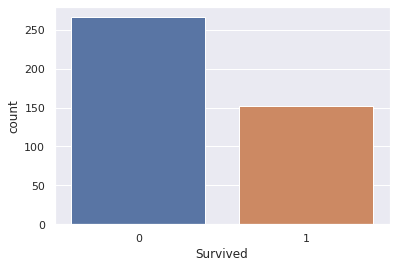

In [26]:
# making a count plot for survived column
sns.countplot('Survived', data=titanic_data)

In [27]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


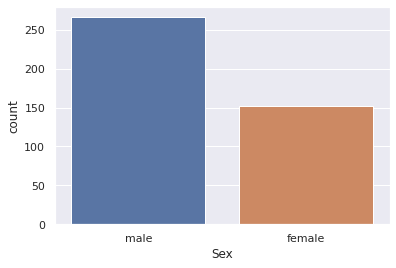

In [28]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


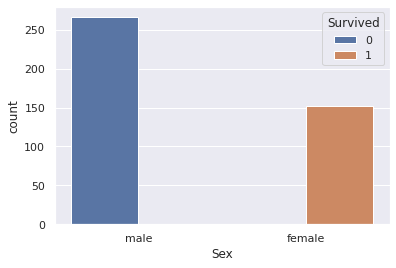

In [29]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


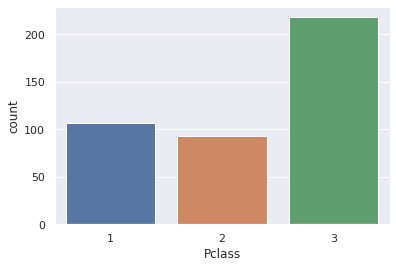

In [30]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


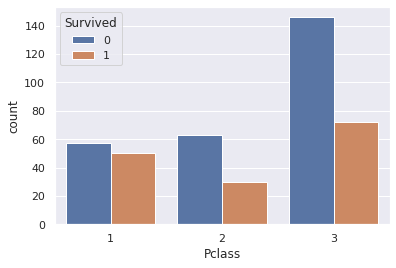

In [31]:
sns.countplot('Pclass', hue='Survived', data=titanic_data)

Encoding the categorical columns

In [32]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [33]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
# converting categoical columns
titanic_data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [36]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


Separating the features & target

In [39]:
x = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = titanic_data['Survived']

In [40]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [41]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


splitting the data into training and testing data

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [43]:
print(x.shape, x_train.shape, x_test.shape)

(418, 7) (334, 7) (84, 7)


Model Training

In [44]:
model = LogisticRegression()

In [46]:
# Training the LogisticRegression model with training model
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [47]:
# accuracy on training data
x_train_prediction = model.predict(x_train)

In [48]:
print(x_train_prediction)

[1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0
 0]


In [51]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)

Accuracy score of training data : 1.0


In [53]:
# accuracy on test data
x_test_prediction = model.predict(x_test)

In [54]:
print(x_test_prediction)

[1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 1 1 1 0 0 0]


In [55]:
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 1.0
